# <center> ESTUDIO DE LA CORRELACIÓN ENTRE LA TRM Y LOS CASOS CONFIRMADOS DE COVID-19 EN COLOMBIA </center>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
from datetime import datetime
from seaborn import boxplot
from seaborn import distplot
sns.set()

# Preprocesamiento de los datos 

### Importamos dataset casos covid-19 en colombia

In [2]:
df_covid = pd.read_csv(r"C:\Users\danie\Desktop\Cursos\Curso DS4A\Proyecto\Casos_confirmados_col.csv")
df_covid = df_covid.fillna(0) # rellenamos espacios faltantes de enero 2020 con 0 ya que en esa fecha no había casos confirmados
df_covid

,FECHA,CASOS
0,2022-10-28,6309168.0
1,2022-10-27,6309168.0
2,2022-10-26,6309168.0
3,2022-10-25,6309168.0
4,2022-10-24,6309168.0
...,...,...
1027,2020-01-05,0.0
1028,2020-01-04,0.0
1029,2020-01-03,0.0
1030,2020-01-02,0.0


### Importamos dataset TRM

In [3]:
df_trm = pd.read_excel(r"C:\Users\danie\Desktop\Cursos\Curso DS4A\Proyecto\TRM.xlsx")
df_trm = df_trm.sort_values(by='FECHA',ascending=False, ignore_index=True)
df_trm = df_trm.query("FECHA > '2020-01-01' and FECHA <= '2022-10-28'")  # Filtramos el dataset de TRM por fecha
df_trm

,FECHA,TRM
42,2022-10-28,4821.92
43,2022-10-27,4895.29
44,2022-10-26,4948.14
45,2022-10-25,4968.94
46,2022-10-24,4913.24
...,...,...
1068,2020-01-06,3262.05
1069,2020-01-05,3262.05
1070,2020-01-04,3262.05
1071,2020-01-03,3258.84


### Creamos una columna de fechas 

Creamos una columna **Fecha**, la cual nos servirá como comparación entre datasets de casos confirmados de la covid-19 y TRM. Así mismo, podremos eliminar las filas del dataset de **TRM** que no comparten temporalidad con la columna **Fecha** y **CASOS**

In [4]:
fecha = pd.date_range(name= 'Fecha', start='2020-01-01', end='2022-10-28', freq='D')
df_fecha = pd.DataFrame(fecha, dtype= 'datetime64[ns]')
df_fecha = df_fecha.sort_values(by='Fecha',ascending=False, ignore_index=True)
df_fecha

,Fecha
0,2022-10-28
1,2022-10-27
2,2022-10-26
3,2022-10-25
4,2022-10-24
...,...
1027,2020-01-05
1028,2020-01-04
1029,2020-01-03
1030,2020-01-02


### Concatenación de datasets

In [5]:
df0 = pd.concat([df_fecha, df_covid['CASOS'] , df_trm['TRM']], axis=1, join='inner')
df0

,Fecha,CASOS,TRM
42,2022-09-16,6305562.0,4821.92
43,2022-09-15,6305562.0,4895.29
44,2022-09-14,6304317.0,4948.14
45,2022-09-13,6304317.0,4968.94
46,2022-09-12,6304317.0,4913.24
...,...,...,...
1027,2020-01-05,0.0,3378.29
1028,2020-01-04,0.0,3378.29
1029,2020-01-03,0.0,3385.11
1030,2020-01-02,0.0,3394.80


## Indexamos por fecha el dataset para facilitar el manejo del dataset

In [6]:
df = df0.set_index('Fecha') ## función para indexar la fecha
df

,CASOS,TRM
Fecha,,
2022-09-16,6305562.0,4821.92
2022-09-15,6305562.0,4895.29
2022-09-14,6304317.0,4948.14
2022-09-13,6304317.0,4968.94
2022-09-12,6304317.0,4913.24
...,...,...
2020-01-05,0.0,3378.29
2020-01-04,0.0,3378.29
2020-01-03,0.0,3385.11


## Normalización de datos 

Normalizamos los datos con el método *min-max* para facilitar la visualización de los datos y hacer que compartan un mismo dominio de **[0:1]** 

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.describe()

,CASOS,TRM
count,990.000000,990.000000
mean,0.498727,0.302232
std,0.382158,0.174535
min,0.000000,0.000000
25%,0.102084,0.191532
50%,0.477202,0.274976
75%,0.856900,0.368409
max,1.000000,1.000000


# Análsis exploratorio 

In [7]:
df.describe().round(2)

,CASOS,TRM
count,990.00,990.00
mean,3144755.21,3859.03
std,2409720.04,277.62
min,0.00,3378.29
25%,643694.25,3682.95
50%,3009029.50,3815.68
75%,5403233.75,3964.30
max,6305562.00,4968.94


## Gráfico de caja y bigotes

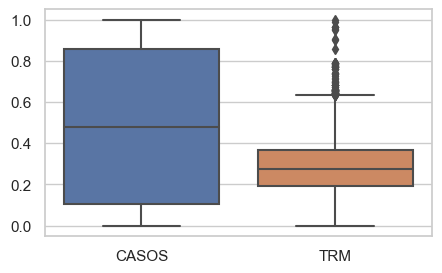

In [80]:
fig, ax = plt.subplots(figsize = (5,3))
sns.boxplot(data = df_norm, linewidth= 1.5)
plt.show()


## Gráficos de barras

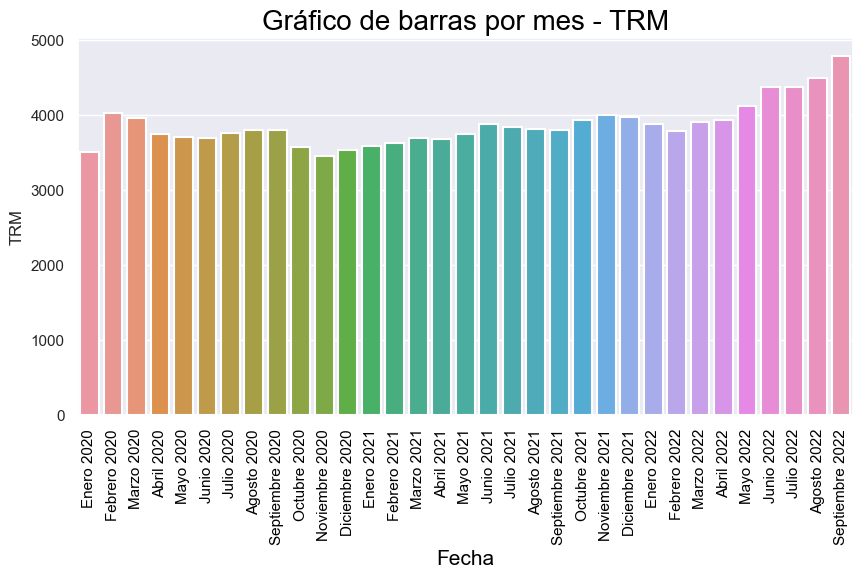

In [140]:
a = df.resample('M').mean()
a = a.reset_index(); 

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Fecha', y='TRM', data = a, linewidth= 1.5)
plt.title('Gráfico de barras por mes - TRM', fontsize=20, color="black")
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.xticks ( [0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,],
            ['Enero 2020', 'Febrero 2020', 'Marzo 2020', 'Abril 2020', 'Mayo 2020', 'Junio 2020', 'Julio 2020', 'Agosto 2020', 'Septiembre 2020', 'Octubre 2020', 'Noviembre 2020', 'Diciembre 2020',
            'Enero 2021', 'Febrero 2021', 'Marzo 2021', 'Abril 2021', 'Mayo 2021', 'Junio 2021', 'Julio 2021', 'Agosto 2021', 'Septiembre 2021', 'Octubre 2021', 'Noviembre 2021', 'Diciembre 2021',
            'Enero 2022', 'Febrero 2022', 'Marzo 2022', 'Abril 2022', 'Mayo 2022', 'Junio 2022', 'Julio 2022', 'Agosto 2022', 'Septiembre 2022'], rotation=90, color='black')
plt.show()



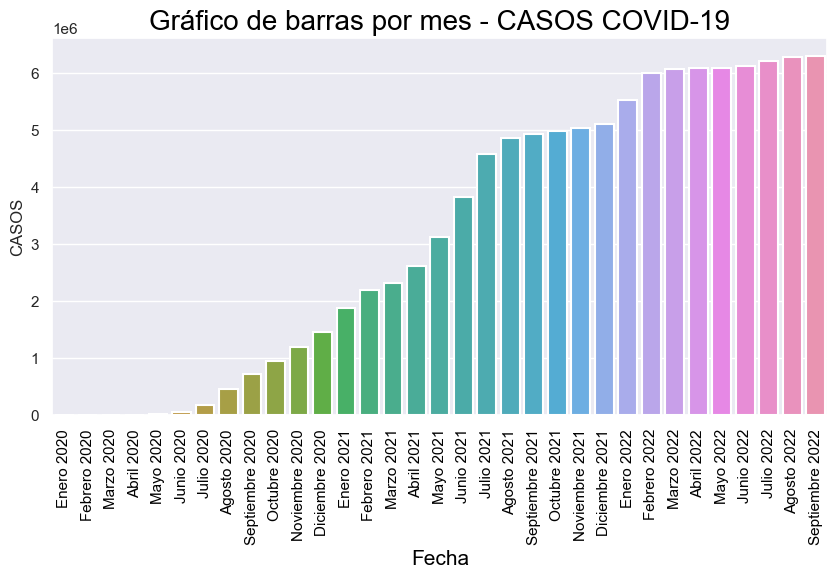

In [136]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Fecha', y='CASOS', data = a, linewidth= 1.5)
plt.title('Gráfico de barras por mes - CASOS COVID-19', fontsize=20, color="black")
plt.xlabel("Fecha", fontsize=15, color="black") 
plt.xticks ( [0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,],
            ['Enero 2020', 'Febrero 2020', 'Marzo 2020', 'Abril 2020', 'Mayo 2020', 'Junio 2020', 'Julio 2020', 'Agosto 2020', 'Septiembre 2020', 'Octubre 2020', 'Noviembre 2020', 'Diciembre 2020',
            'Enero 2021', 'Febrero 2021', 'Marzo 2021', 'Abril 2021', 'Mayo 2021', 'Junio 2021', 'Julio 2021', 'Agosto 2021', 'Septiembre 2021', 'Octubre 2021', 'Noviembre 2021', 'Diciembre 2021',
            'Enero 2022', 'Febrero 2022', 'Marzo 2022', 'Abril 2022', 'Mayo 2022', 'Junio 2022', 'Julio 2022', 'Agosto 2022', 'Septiembre 2022'], rotation=90, color='black')
plt.show()



## Series de tiempo 

### Serie de tiempo - TRM 

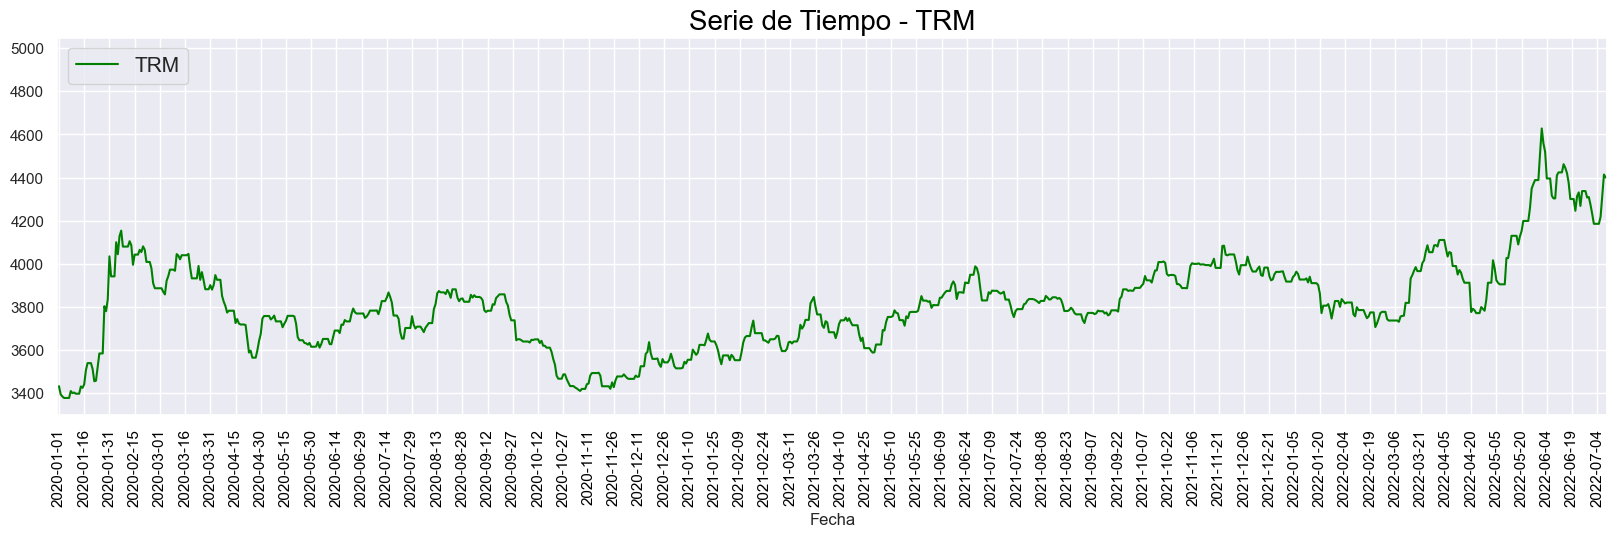

In [147]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = df['TRM'], label='TRM', color='green')
plt.ylabel("", fontsize=15, color="black")
plt.title('Serie de Tiempo - TRM', fontsize=20, color="black")
ax.legend( prop = {'size': 15}, loc='upper left')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-10-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

### Serie de tiempo - Casos Activos COVID-19 

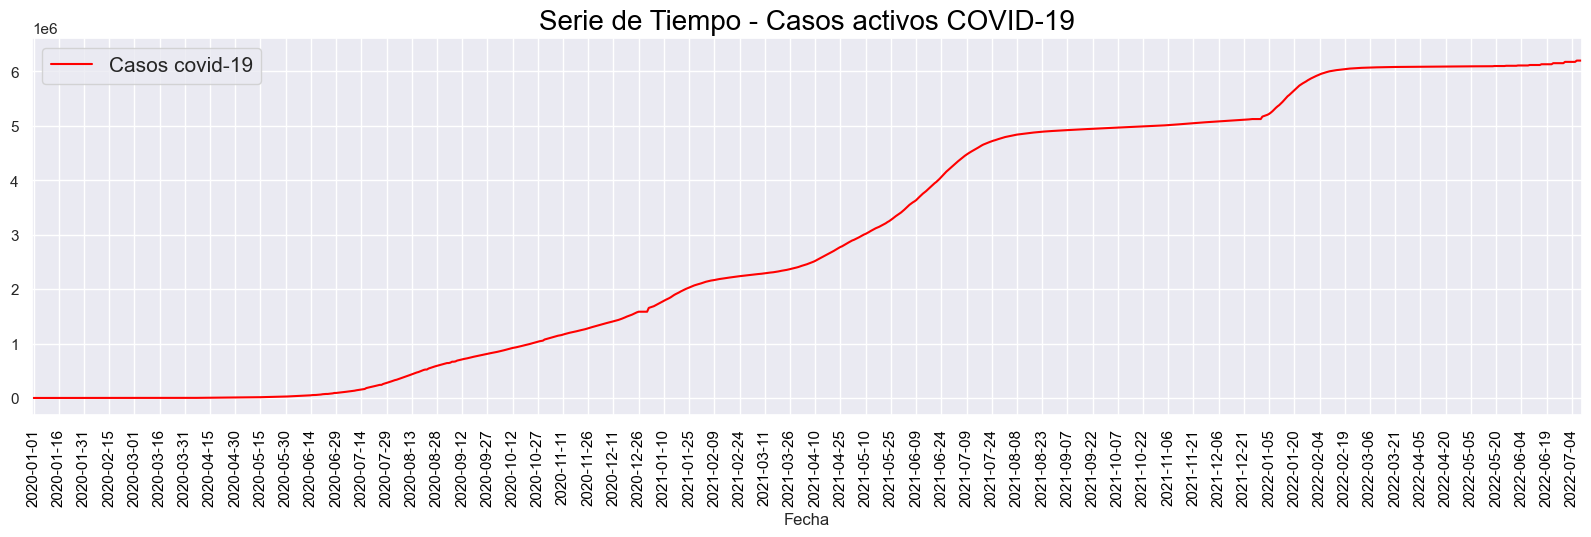

In [146]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = df['CASOS'], label='Casos covid-19', color='red')
plt.ylabel("", fontsize=15, color="black")
plt.title('Serie de Tiempo - Casos activos COVID-19', fontsize=20, color="black")
ax.legend( prop = {'size': 15}, loc='upper left')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-10-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

### Series de tiempo normalizadas

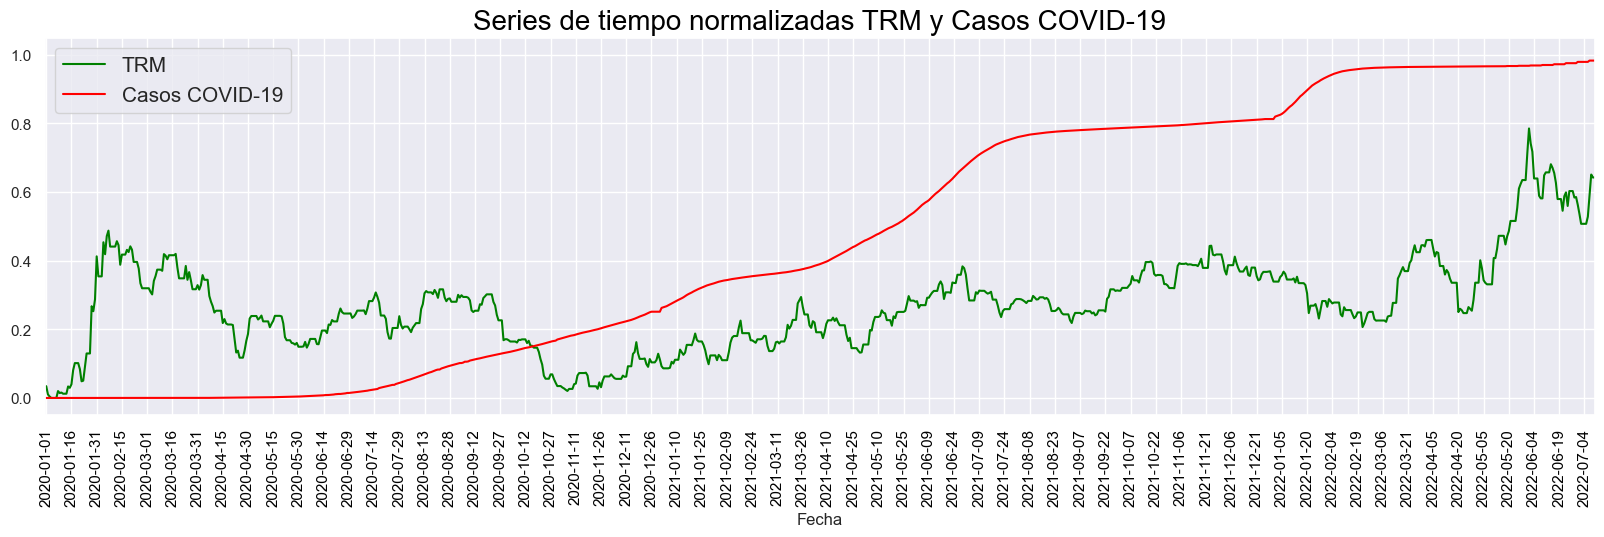

In [150]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = df_norm['TRM'], label='TRM', color='green')
sns.lineplot(data = df_norm['CASOS'], label='Casos COVID-19', color='red')
plt.ylabel("", fontsize=15, color="black")
plt.title('Series de tiempo normalizadas TRM y Casos COVID-19', fontsize=20, color="black")
ax.legend( prop = {'size': 15}, loc='upper left')
plt.xticks (pd.date_range (start='2020-01-01',end= '2022-08-30', freq='15D'), rotation=90, color='black')
ax.set_xbound(lower=18261, upper= 19183)
plt.show()

## Análisis de correlación

In [134]:
 a = df.corr().round(5) ## calcula la correlación por pares de columnas, con el coeficiente de correlación de Pearson

Según la *Prueba de Correlación de Pearson* existe una correlación positiva entre la serie de tiempo de la *TRM* y *Casos diarios de la covid-19*. Lo que nos indica que dichas variables se correlacionan directamente en un **61,59%**.